# Breakable Commitments...
## Code to generate figures
**Karna Basu and Jonathan Conning**

Department of Economics, Hunter College and The Graduate Center, City University of New York

In [1]:
%reload_ext watermark
%watermark -u -n -t 

Last updated: Mon Oct 17 2016 16:23:41 


**Abstract:** Important empirical and theoretical literaturea have developed around models of procrastination and the struggle for self-control or resistance to present-bias or temptation. A popular modeling strategy is to follow Laibson (1997) in assuming that consumers are present-biased and have time inconsistent $\beta-\delta$ quasi-hyperbolic and preferences. While several papers have analyzed different properties of this model have variations and extensions have even been employed in calibrated numerical macro models, we are not aware of any papers that explain the model in simple graphical terms. 

  This note describes the relatively simple mathematical and graphical analysis of the challenges facing a time-inconsistent in consumer attempting to smooth consumption over time. Because the sophisticated present-biased quasi-hyperbolic discounter anticipates the ways in which her future self will attempt to renegotiate or refinance the terms of a contract, she acts to choose the terms of the contract anticipating her latter-period self's best reaction. The equilibrium contract is found as the sub-game perfect Nash equilibrium of a Stackelberg game.  The equilibrium that the time-inconsistent consumer can achieve on her own will in general deliver less utility than if the period zero consumer could commit their latter selves to sticking to the the terms of the contract that the period zero self prefers.  This gives rise to the demand fr commitment services.

## Python Preliminaries

The simulations and diagrams below were written in python. The following code block just imports various libraries and sets a few global parameters.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from ipywidgets import interact,fixed
plt.rcParams['figure.figsize'] = 10, 8
np.set_printoptions(precision=2) 

## The model

Consider the following simple workhorse three-period consumption smoothing model where consumers' preferences are summarized by constant relative risk aversion (CRRA) utility. In any period the consumer's instantaneous utility is given by $u(c)=c^{1-ρ}/(1-ρ)$.  Over three period the agent maximizes utility

$$ U(c_0, c_1, c_2) =u(c_0) + \beta [\delta u(c_1) + \delta^2 u(c_2)]$$ 

This is a version of the classic $\beta-\delta$ quasi-hyperbolic discounting model.  We assume the consumer has an autarky income stream ${y}=\{y_{0},y_{1},y_{2}\}$ which defines autarky or reservation utility $ \overline{u}(y) = U(y₀,y₁,y₂)$ but in general will prefer a smoother consumption profile from contracting on financial markets. 

### Consumption smoothing with and without commitment services

#### Competitive full-commitment
Assume at first that financial intermediaries compete to offer contracts to a client.  

Let's assume at first that a financial intermediary can offer a multiperiod contract and can -- at zero cost -- credibly commit to not renegotiating the terms of that contract. For the moment as well we will assume that this contract can also be made exclusive in the sense that we can stop a new bank from offering a more attractive additional or alternative contract to the period 1 self.  We'll relax both assumptions shortly.

The offered contract will maximize the period-0 self's present value of utility $$ U(c_{0},c_{1},c_{2})=u(c_{0})+\beta \left[ \delta u(c_{1})+\delta ^{2}u(c_{2})\right] $$
subject to the bank's zero profit condition or, same thing, consumer budget constraint:

$$\sum\limits_{t=0}^{2}\frac{\left( y_{t}-c_{t}\right) }{\left( 1+r\right) ^{t}} = 0$$


At the optimal contract $C^fc$ the consumer may save or borrow, depending on their initial income stream and preferred/feasible smoothed consumption stream available from contracting.  

The first order conditions for an optimum are:

$$u'(c_0) = \beta \delta (1+r) u'(c_1)$$

$$u'(c_1) = \delta (1+r) u'(c_2)$$

The optimal contract will be the three period consumption profile that brings the consumer to the highest feasible iso-utility surface (analagous to an indifference curve except in 3 dimensins), and that will be at a point where the iso-utility surface is tangent to the zero-profit hyperplane that cuts through endowment point *$y$*  

Rather than try to depict the optimal contract om three-dimensional space, we will employ a simple trick to depict the optimal contract in two-dimensional figures.  Since the optimal contract must satisfy the consumer budget or zero-profit constraint, if we know the $c_0$ and $c_1$ the value of $c_2$ is determined from the budget constraint.

For the CRRA case these can be rewritten as:

$$c_1 = c_0 [ \beta \delta (1+r) ]^\frac{1}{\rho}$$

$$c_1 = c_2$$

In what follows we'll assume for simplicity and without loss of generality that $\delta = \frac{1}{1+r}$ and furthermore that $r=0$ and hence $\delta = 1$. This simplifies the expressions without changing the essential tradeoffs.

If we substitute the FOC $c_1=c_2$ into the consumer's binding budget constraint (the bank's zero profit condition) the problem can be reduced from three equation (two FOC and the zero profit condition) to two:

$$c_1 = \beta^\frac{1}{\rho} c_0$$

$$ c_1 = \frac{\sum y - c_0}{2}$$

The first equation highlight's the period-zero self's present bias --they want to consume more in period zer than in period one--  while the second summarizes that hey want to smooth whatever resources are left to future consumption equally between periods 1 and 2. 

Figure 1 below illustrates how the equilibrium contract is determined, drawn for the CRRA case where $\beta=0.5$ and $\rho = 1$ and $\sum y =300$.  The first of these two lines (that the MRS between period 0 and period 1 equal the price ratio or interest rate) can be seen as the upward sloping income-expansion income-expansion line in the rightmost quadrant diagram in $c_0$ and $c_1$ space.   The second line which combines the second FOC and zero profit condition is seen as the downward sloping dashed line.

The two dashed lines meet at point $(c_0^{fc}, c_1^{fc})$ in the rightmost quadrant.  

The leftmost quadrant is in $c_1$ and $c_2$ space, turned on its side, 90 degrees counterclockwise. The FOC condition ($c_1 = c_2$) is represented by a 45 degree line.  We can simply read off $c_2 = c_1$ from this line and the value of $c_1$ determined in the other quadrant, but we should also note that the point of intersection must also satisfy the budget constraint, namely that consumption in periods 1 and 2 cannot exceed the value of the endowment less period zero consumption. 

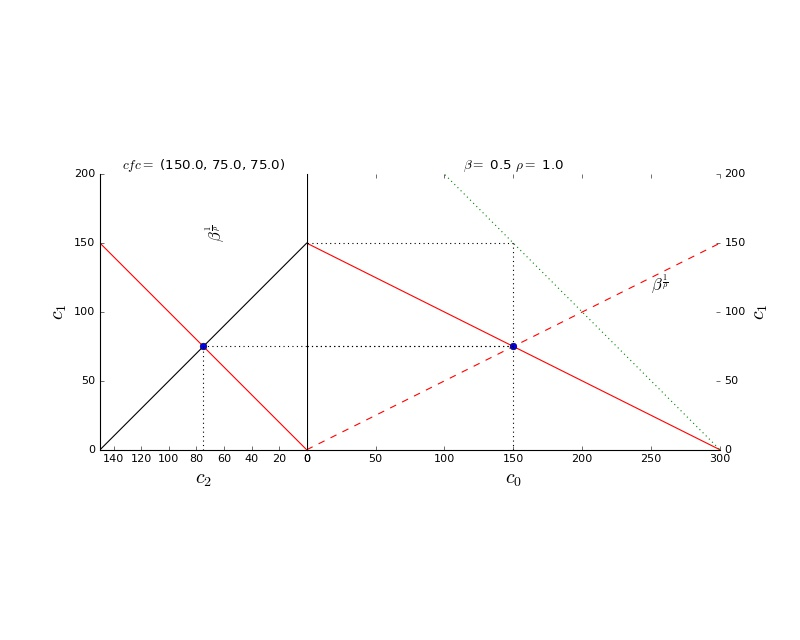

In [3]:
from IPython.display import Image, display
i = Image(filename='Figure1.jpg')
display(i)

For the CRRA case it's easy to find closed form solutions:

$$c_0^{fc} = \frac{\sum y}{1+2\beta^\frac{1}{\rho}}$$
$$c_1^{fc} = c_2^{fc} = \beta^\frac{1}{\rho} c_0^{fc} $$

#### A simple numerical example

Suppose the model parameters were as follows (and as all along $r=0$ and $\delta=1$)

In [4]:
beta = 0.5
rho = 1
Y = 300

The following function solves for period zero's optimal 'full commitment contract' using the equations above (note: Competitive.fcommit() calculates the same):

In [5]:
def c0fc(beta=beta, rho=rho):
    '''Full Commitment contract'''
    btr = beta**(1/rho)
    Y = 300
    c0 = Y/(1+2*btr)
    return c0, btr*c0, btr*c0

The optimal contract for these parameters is 

In [6]:
c0fc()

(150.0, 75.0, 75.0)

If the consumer had an income stream  $ y =(100, 100, 100)$ then we'd interpret this as a borrowing contract, as the period 0 consumer would want to borrow 50 in period zero andthen balance repayments between period 1 and 2.

Saving/repayments (positives) and borrowing/dissaving (negatives) in each period would be written:

In [7]:
[100, 100, 100] - np.array(c0fc())

array([-50.,  25.,  25.])

If on the other hand the consumer had an income stream  $ y =(200, 50, 50)$ then we'd interpret this as a savings contrac, with the consumer saving 50 in period zero to be shared equally between period 1 and 2 consumption.

## refinance and self-control

We recast this slightly to focus on the role of savings.  Period 0 self (henceforth 'zero-self') chooses period zero savings $s_0$ (and by implication period 0 consumption $c_0 = y_0 - s_0$).  In period 1 his later 'one-self' reacts by choosing her own preferred period 1 savings $s_1$ (or, same thing $c_1$ and by implication $c_2$).  

We need to find one-self's 'reaction function'.  They choose $c_1$ to maximize

$$u(c_{1})+\beta \delta u(c_{2})$$

subject to

$$c_1(1+r)+c_2 =y_1 (1+r) +y_2+s_0 (1+r)^2$$

The FOC give us

$$u'(c_{1})=\beta \delta(1+r) {u'(c_2)} $$

which for this CRRA case give us

$$c_{2} = [\beta \delta (1+r) ]^\frac{1}{\rho} c_1$$

Substituting this into the intertemporal budget constraint above we can solve for the reaction function:

$$ c_1(s_{0} )= \frac{s_0 (1+r)^2+y_1 (1+r) +y_2}
{(1+r)+[ \beta \delta(1+r)]^\frac{1}{\rho} }
 $$

Note that if $\delta=\frac{1}{1+r}$ and $r=0$ then this last expression simplifies to:
    
$$ c^1_1(s_{0} )= \frac{s_0+y_1 +y_2}{1 + \beta ^\frac{1}{\rho} }  $$
 
 Without loss of generality we will focus on this stripped down version of the expression.

Note that the zero-self wants each extra dollar of saving (or debt) $s_0$ that they pass on to period one that 1/2 of that dollar be for period 1 and the other half for period 2.  In other words they want

$$\frac{dc^0_1}{ds_0} = \frac{dc_2}{ds_0} =\frac{1}{2}$$

But One-self instead prefers 

$$\frac{dc^1_1}{ds_0} =\frac{1}{1+\beta^\frac{1}{\rho}} > \frac{1}{2}$$
and 
$$\frac{dc^1_2}{ds_0} =\frac{\beta^\frac{1}{\rho}}{1+\beta^\frac{1}{\rho}}<\frac{1}{2}$$

Zero-self will therefore act to strategically control how much savings is passed on, behaving much like a Stackelberg leader.

They choose $s_0$ to:
    
$$\max u(y_0-s_{0})+\beta \left[ u(c^1_1(s_0))+u(c^1_2(s_0))\right] $$

Recall that One-self will always have $c_2^1 =\beta^\frac{1}{\rho} c_1^1$ and also note that for the CRRA case we can write
$u(\beta^\frac{1}{\rho}c_1^1)=\beta^\frac{1-\rho}{\rho}u(c_1^1)$ 
so we can rewrite the objective as:

$$\max u(y_0-s_{0})+\beta (1+\beta^\frac{1-\rho}{\rho}) u(c^1_1(s_0))$$

The  FOC will therefore be:
$$u'(y_0-s_0) = \beta (1+\beta^\frac{1-\rho}{\rho}) u'(c_1^1(s_0)) \frac{dc_1^1}{ds_0}$$

$$u'(y_0-s_0) = \frac{\beta +\beta^\frac{1}{\rho}}{1+\beta^\frac{1}{\rho}} u'(c_1^1(s_0)) $$

and after some substitutions and simplifications:
$$(y_0-s_0)^{-\rho}
= \frac{ \beta+\beta^\frac{1}{\rho}}{1+\beta^\frac{1}{\rho}}
(\frac{s_0+y_1 +y_2}{1 + \beta ^\frac{1}{\rho} })^{-\rho} $$

$$   \frac{s_0+y_1 +y_2}{1 + \beta ^\frac{1}{\rho} }
= \Lambda^\frac{1}{\rho}
(y_0-s_0) $$

where $\Lambda = \frac{\beta +\beta^\frac{1}{\rho}}{1+\beta^\frac{1}{\rho}}$

Or solving for  $c_0$ :

$$c_0 = \frac{\sum y}{1+\Lambda^\frac{1}{\rho}(1+\beta^\frac{1}{\rho})} $$

Note that we can compare period 0 consumption under this 'own smoothing' situation to the full commitment situation where we have shown that:

$$c_0 = \frac{\sum y}{1+2\beta^\frac{1}{\rho}} $$

From which it's clear that savings is higher or lower depending on a comparison of the two denominators... Empirically however the difference in period 0 consumption seems very small... Most of the action is in terms of period 1 and 2 as the follownig shows.

### Visualized

As in the other notebooks we import a module that gives us a generic 'Contract' class that defines a few attributes (e.g. default parameters of the utility function, initial endowments, etc.) and useful methods to calculate profits, utility, etc.

(Noe Competitive.ownsmooth() calculates the same as c0own)

In [8]:
def c0own(beta=beta, rho=rho):
    '''Own-smoothing contract'''
    btr = beta**(1/rho)
    lm = (beta + btr)/(1+btr)
    c0 = Y/(1+(1+btr)*lm**(1/rho))
    c1 = (Y-c0)/(1+btr)
    c2 = btr*c1
    return c0, c1, c2
    
    
def plotC(rho=rho):
    bt = np.linspace(0,1, 100)
    fig, ax = plt.subplots(figsize=(7,6))
    c0F,c1F,c2F = c0fc(bt, rho)
    c0o,c1o,c2o = c0own(bt, rho)
    ax.plot(bt, c0F)
    ax.plot(bt, c1F)
    ax.plot(bt, c0F+c1F,'r')
    ax.plot(bt, c0o,'--')
    ax.plot(bt, c1o,'--')
    ax.plot(bt, c0o+c1o,'r--')
    ax.plot(bt, c2o,'--')
    fig.suptitle(r'$\rho$ = {}'.format(rho),fontsize=18)
    ax.set_xlabel(r'$\beta$', fontsize=16)
    plt.grid()
    plt.show()
    return

In [9]:
c0fc(beta, rho)

(150.0, 75.0, 75.0)

In [10]:
c0own()

(150.0, 100.0, 50.0)

### How optimal contract depends on $\rho$ and $\beta$

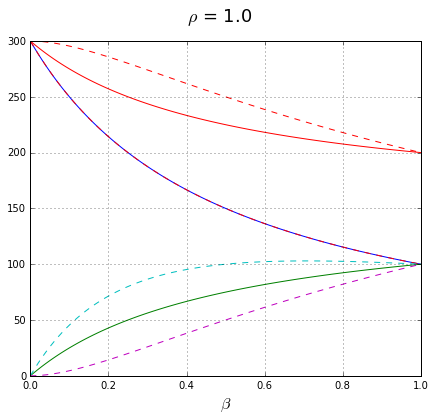

<function __main__.plotC>

In [11]:
interact(plotC,y0=(1,150,1),y1=(1,150,1),rho=(0.1,3,0.05))

## Best response function, and Stackelberg
Competitive case

Note: Once again we are just working out what Contract module already does with its own methods.  c1br is just like Competitive.renegC(c) and c0rp is Competitive.reneg_proof(monop_reg = False)

In [12]:
import Contract as ctr

In [13]:
CC = ctr.Competitive(beta=0.5)
CC.rho=1
CC.fcommit()

array([ 150.,   75.,   75.])

In [14]:
def c1br(c0, beta=beta, rho=rho):
    '''One Selfs best response to Zero-self contract '''
    btr = beta**(1/rho)
    c11 = (Y - c0)/(1+btr)
    c12 = btr*c11
    return c0,c11,c12
    
def c0rp(beta=beta, rho=rho):
    '''Zero's Stackelberg contract '''
    btr = beta**(1/rho)
    lam = (beta + btr)/(1+btr)
    lmr = lam**(1/rho)
    c00rp = Y/(1+(1+btr)*lmr)
    c01rp = lmr*c00rp
    c02rp = btr*c01rp
    return c00rp, c01rp, c02rp 

In [15]:
c0fc()

(150.0, 75.0, 75.0)

In [16]:
c0rp()

(150.0, 100.0, 50.0)

In [18]:
CC.reneg_proof()

     fun: -9.2692311803624943
   maxcv: 4.1211478674085811e-13
 message: 'Optimization terminated successfully.'
    nfev: 84
  status: 1
 success: True
       x: array([ 149.85,  100.1 ,   50.05])

In [22]:
CC.renegC(c0fc())

array([ 150.,  100.,   50.])

In [23]:
cc = np.linspace(0,300,300)

In [24]:
cc = np.linspace(0,300, 100)
btr = beta**(1/rho)
lam = (beta + btr)/(1+btr)
lmr = lam**(1/rho)

## Two-quadrant plot of Figure 1

In [25]:
def bdplot(beta=beta, rho=rho, fc = True, rp = True, figname='Figure'):
    '''Plot two quadrant diagram representation. The flag fc and rp allow us to turn on
    or supress full commit or '''
    ymax = 200
    aspect = 1
    cfc = c0fc(beta=beta, rho=rho)
    crp = c0rp(beta=beta, rho=rho)
    fontsize = 18
    
    btr = beta**(1/rho)
    lam = (beta + btr)/(1+btr)
    lmr = lam**(1/rho)

    fig = plt.figure()
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2]) 

    ax0 = plt.subplot(gs[1])
    ax0.set_title(r'$\beta=$ {:2.1f} $\rho=$ {:2.1f}'.format(beta, rho))
    ax0.set_ylim(0, ymax)
    ax0.yaxis.set_label_position("right")
    ax0.yaxis.tick_right()
    ax0.set_xlabel(r'$c_0$', fontsize=fontsize)
    ax0.set_ylabel(r'$c_1$', fontsize=fontsize)

    ax1 = plt.subplot(gs[0])
    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_label_position('left')
    ax1.set_ylabel(r'$c_1$', fontsize=fontsize)
    ax1.set_title(r'$cfc=$ ({:3.1f}, {:3.1f}, {:3.1f})'.format(cfc[0],cfc[1],cfc[2]))
    
    if fc:
        fcstyle = '--'
        fccolor = 'r'
        if fc and not rp:
            linestyle = '-'
        ax0.plot(cc, 0.5*(Y-cc),'r-', label='Zero FC future')
        ax0.plot(cc, btr*cc, linestyle=fcstyle, color = fccolor, label='FC smooth')
        ax0.text(250, btr*230, r'$\beta^\frac{1}{\rho}$', fontsize=15)
        ax0.plot(cfc[0],cfc[1], marker='o')
        ax0.plot(cc, Y-cc, ':', label = 'Future net income')
        ax1.plot(cc, (Y-cfc[0])-cc,'k-')
        ax1.plot(cc, cc,'r-')
        ax1.plot(cfc[2], cfc[1],marker='o')
        xx = [cfc[0]]
        yy = [cfc[1]]
        zz = [cfc[2]]

    if rp:
        ax0.plot(cc, c1br(cc, beta, rho)[1],'b-', label = 'One BR')
        ax0.plot(cc, lmr*cc,'b-', label='Stackelberg')
        ax0.plot(crp[0],crp[1],marker='o')    
        ax0.text(250, lmr*235, r'$\Lambda^\frac{1}{\rho}$', fontsize=15)
        ax1.plot(crp[2], crp[1],marker='o')
        ax1.plot(cc, cc*btr**(-1),'b-')
        xx = [crp[0]]
        yy = [crp[1]]
        zz = [crp[2]]
        
    [ax0.plot([dot_c0, dot_c0], [0, dot_c1],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ] 
    [ax0.plot([0, dot_c0], [dot_c1, dot_c1],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ]
    [ax0.plot([0, dot_c0], [dot_c1, dot_c1],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ]
    [ax0.plot([dot_c0, dot_c0], [dot_c1, Y-dot_c0],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ]
    [ax0.plot([dot_c0, 0], [Y-dot_c0, Y-dot_c0],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ]
    [ax1.plot([dot_c2, dot_c2], [0, dot_c1],':',linewidth = 1,color='black' ) for dot_c1, dot_c2 in zip(yy,zz) ]
    [ax1.plot([dot_c2,0], [dot_c1, dot_c1],':',linewidth = 1,color='black' ) for dot_c1, dot_c2 in zip(yy,zz) ]

    ax1.set_ylim(0,ymax)
    ax1.set_xlim(0,150)
    ax1.invert_xaxis()
    ax1.set_xlabel('$c_2$', fontsize=fontsize)

    for side in ['right','top']:
        ax0.spines[side].set_visible(False)
        ax1.spines[side].set_visible(False)

    #scaling and grid    
    ax0.set_aspect(aspect)
    ax1.set_aspect(1)
    #ax0.grid()
    #ax1.grid()

    #ax0.text(20, 0.5*(Y-50), r'$\frac{1}{2}\sum (y-c_0)$', fontsize=14)
    #ax0.text(20, (1/(1+btr))*(Y-30), r'$\frac{1}{1+\beta^\frac{1}{\rho}}\sum (y-c_0)$', fontsize=14)

    ax1.text(btr*150, 150,  r'$\beta^\frac{1}{\rho}$', fontsize=15, rotation='vertical')


    fig.subplots_adjust(wspace=0)
    plt.show()
    fig.savefig(figname+'.jpg', dpi=fig.dpi)
    return

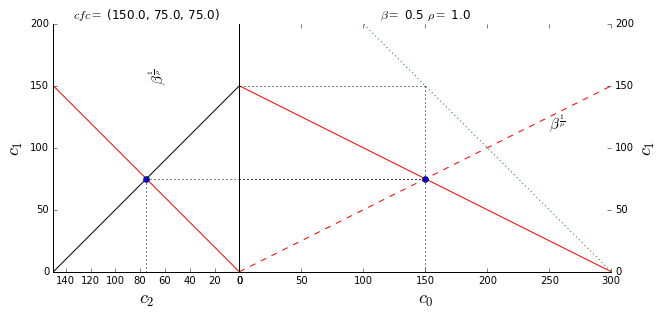

In [26]:
bdplot(fc=True, rp=False, figname='Figure1')

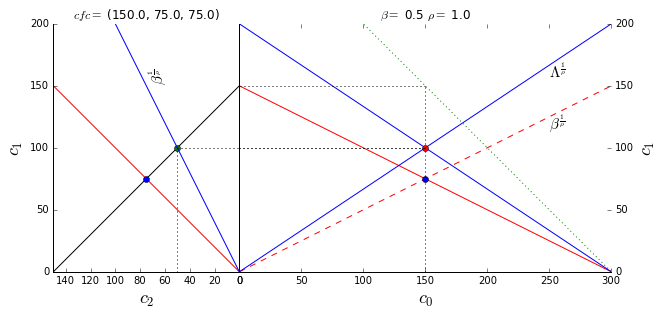

In [27]:
interact(bdplot,beta=(0.1,1,0.1),rho=(0.1,3,0.05))

## Figure 2: Full commitment and renegotiation-proof contracts under Competition

In [62]:
import Contract as ct

In [ ]:
y =[100,100,100]
cM = ct.Monopoly(beta = 0.5)
cM.rho = 1
cM.y = [110,95,95]
cMF = cM.fcommit()         # the full commitment contract 
cMR = cM.reneg(cMF)        # what renegotiate to if full commitment unantipatedly undone  
# Let's find reneg-proof contract for pure profit with zero reneg. cost
cM.kappa = 0
cM.guess = cMF
cMRP = cM.reneg_proof().x

## Figure 2: Full commitment and renegotiation-proof contracts under Monopoly

In [37]:
import Contract as ct

In [60]:
y =[100,100,100]
cM = ct.Monopoly(beta = 0.5)
cM.rho = 1
cM.y = [110,95,95]
cMF = cM.fcommit()         # the full commitment contract 
cMR = cM.reneg(cMF)        # what renegotiate to if full commitment unantipatedly undone  
# Let's find reneg-proof contract for pure profit with zero reneg. cost
cM.kappa = 0
cM.guess = cMF
cMRP = cM.reneg_proof().x

In [51]:
# limit values to display
c1min, c1max = np.min(cMR)*0.6, np.max(cM.y)
c1min, c1max = 0, 160
c1 = np.arange(0,c1max,c1max/20)
c1_ = np.arange(40,c1max,c1max/20)

#define indifference curves functions 
# full-commit and RP utility for period-0 and period 1 selves
ubar0 = cM.PVU(cMF[1:3], 1.0)   
idc0 = cM.indif(ubar0, 1.0)
ubar1 = cM.PVU(cMF[1:3],cM.beta)
idc1 = cM.indif(ubar1,cM.beta)
ubar0RP = cM.PVU(cMRP[1:3], 1.0)
idc0RP = cM.indif(ubar0RP,1.0)
ubar1RP = cM.PVU(cMRP[1:3], cM.beta)
idc1RP = cM.indif(ubar1RP,cM.beta)

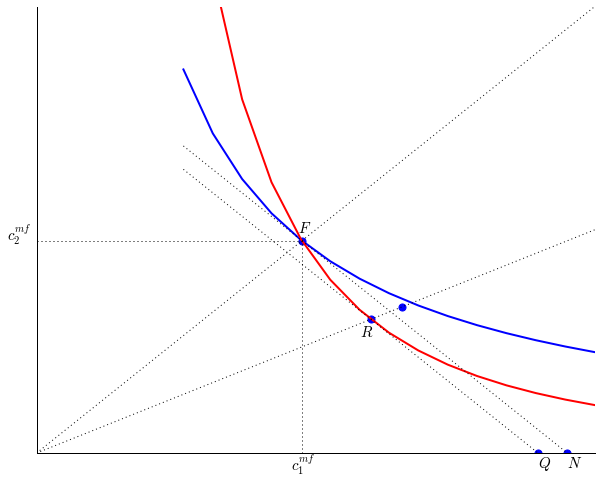

In [61]:
fig, ax = plt.subplots()

# plot indifference curves
plt.plot(c1_,idc0(c1_),color='blue',linewidth=2)          
plt.plot(c1_,idc1(c1_),color='red', linewidth=2) 

# plot rays
plt.plot(c1, c1,':',color='black')
plt.plot(c1, cM.beta**(1/cM.rho)*c1,':',color='black')

# plot isoprofit line(s)
profitMF = cM.profit(cMF,cM.y)
isoprofMF = cM.isoprofit(profitMF-(y[0]-cMF[0]), y)
plt.plot(c1_,  isoprofMF(c1_),':', color='black' )
profitMR = cM.profit(cMR,cM.y)
isoprofMR = cM.isoprofit(profitMR-(y[0]-cMR[0]), y)
plt.plot(c1_,  isoprofMR(c1_),':', color='black' )

# label the points
ax.text(cMF[1]-1, cMF[2]+3, r'$F$', fontsize=15)
ax.text(cMR[1]-3, cMR[2]-6, r'$R$', fontsize=15)
ax.text(Q, -5, r'$Q$', fontsize=15)
ax.text(N, -5, r'$N$', fontsize=15)

ax.text(cMF[1]-3, -6, r'$c^{mf}_{1}$', fontsize=15)
ax.text(-8, cMF[2], r'$c^{mf}_{2}$', fontsize=15)

# draw contract points and coordinate lines http://bit.ly/1CaTMDX
xx = [cMF[1], cMR[1]]
yy = [cMF[2], cMR[2]]
plt.scatter(xx,yy, s=50, marker='o',color='b')
[plt.plot([dot_x, dot_x] ,[0, dot_y],':',linewidth = 1,color='black' ) \
     for dot_x, dot_y in zip([cMF[1]],[cMF[2]]) ] 
[plt.plot([0, dot_x] ,[dot_y, dot_y],':',linewidth = 1,color='black' ) \
     for dot_x, dot_y in zip([cMF[1]],[cMF[2]])  ]

plt.scatter(cMRP[1],cMRP[2], s=50, marker='o',color='b')

# plot intercept points
Q = np.sum(cM.y) - profitMR -cMR[0]
N = np.sum(cM.y) - profitMF -cMF[0]
plt.scatter(Q, 0, s=50, marker='o',color='b')
plt.scatter(N, 0, s=50, marker='o',color='b')

#turn off the axis numbers
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['right'].set_color('none'), ax.spines['top'].set_color('none')
plt.ylim((c1min, c1max*0.95)), plt.xlim((c1min, c1max*0.95))
ax.xaxis.tick_bottom(),ax.yaxis.tick_left()
plt.xlabel('$c_{1}$'); plt.ylabel('$c_{2}$')


plt.savefig('figs\Figure2.pdf', format='pdf')
plt.show()

In [28]:
import Contract

In [31]:
cC = Contract.Competitive(beta=0.5)
cC.rho = 1
cC.print_params()

beta    : 0.5
guess   : [100 100 100]
kappa   : 0
rho     : 1
y       : [100 100 100]


In [33]:
c0fc(cC.beta, cC.rho)

(150.0, 75.0, 75.0)

In [35]:
cCF = cC.fcommit()
cCF

array([ 150.,   75.,   75.])

In [43]:
cCRP = cC.ownsmooth()

In [79]:
#Figure dimensions
plt.rcParams["figure.figsize"] = (11, 8)
c1min, c1max = 0, 160
c1 = np.arange(0,c1max,c1max/20)
c1_ = np.arange(40,c1max*0.9,c1max/20)
y = cC.y

cR = cC.reneg(cCF)   # If reneged on full-commit

#indifference curves functions
ubar0 = cC.PVU(cCF[1:3], 1.0)      #Zero's full-commit indiff
idc0 = cC.indif(ubar0, 1.0)
ubar1 = cC.PVU(cCF[1:3],cC.beta)   #One's full-commit indiff 
idc1 = cC.indif(ubar1,cC.beta)
ubar0RP = cC.PVU(cCRP[1:3], 1.0)
idc0RP = cC.indif(ubar0RP,1.0)      #Zero's 
ubar1RP = cC.PVU(cCRP[1:3], cC.beta)
idc1RP = cC.indif(ubar1RP,cC.beta)

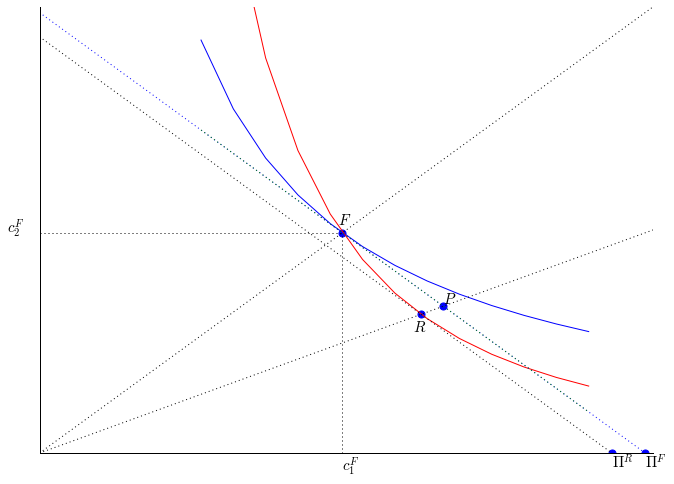

In [96]:
fig, ax = plt.subplots()
# indifference curves
plt.plot(c1_,idc0(c1_),color='blue')     #Zero's full-commit indiff     
plt.plot(c1_,idc1(c1_),color='red')      #One's full-commit indiff 
#plt.plot(c1_,idc0RP(c1_),color='blue')
#plt.plot(c1_,idc1RP(c1_),color='red')

# rays
plt.plot(c1, c1,':',color='black')
plt.plot(c1, cC.beta**(1/cC.rho)*c1,':',color='black')
# isoprofit line(s)
isoprofline = cC.isoprofit(cC.profit(cCF,cC.y)-(y[0]-cCF[0]), y)
plt.plot(c1,  isoprofline(c1),':' )

# label the points
ax.text(cCF[1]-1, cCF[2]+3, r'$F$', fontsize=15)
ax.text(cCRP[1], cCRP[2]+1, r'$P$', fontsize=15)
ax.text(cR[1]-2, cR[2]-6, r'$R$', fontsize=15)
ax.text(cCF[1], -6, r'$c^{F}_{1}$', fontsize=15)
ax.text(-8, cCF[2], r'$c^{F}_{2}$', fontsize=15)
#ax.text(cCRP[1], -6, r'$c^{cp}_{1}$', fontsize=15)
#ax.text(-8, cCRP[2], r'$c^{cp}_{2}$', fontsize=15)

# display guide lines http://bit.ly/1CaTMDX
xx = [cCF[1]]
yy = [cCF[2]]
ax.scatter(xx,yy, s=50, marker='o',color='b')
[ax.plot([dot_x, dot_x] ,[0, dot_y],':',linewidth = 1,color='black' ) for dot_x, dot_y in zip(xx,yy) ] 
[ax.plot([0, dot_x] ,[dot_y, dot_y],':',linewidth = 1,color='black' ) for dot_x, dot_y in zip(xx,yy) ]
ax.scatter(cR[1],cR[2],s=50, marker='o',color='b')
ax.scatter(cCRP[1],cCRP[2],s=50, marker='o',color='b')

#ax.text(0, -10, r'Competitive $\kappa = {}$'
#        .format(cC.kappa), fontsize=12)
#ax.text(0, -15, r'$\beta = {}, \  \rho = {}$'
#        .format(cC.beta, cC.rho), fontsize=12)

# plot isoprofit line(s)
profitCR = cC.profit(cR,cC.y)
isoprofCR = cC.isoprofit(profitCR-(cC.y[0]-cR[0]), cC.y)
plt.plot(c1,  isoprofCR(c1),':', color='black' )

# plot profit intercepts
prf = sum(y)-cCF[0]    #profit through F
prr = sum(y)-cC.profit(cR,cC.y)-cR[0] #profit through R
ax.text(prf, -5, r'$\Pi^F $', fontsize=15)
ax.text(prr, -5, r'$\Pi^R$', fontsize=15)
ax.scatter(prf,0,s=50, marker='o',color='b')
ax.scatter(prr,0,s=50, marker='o',color='b')

# isoprofit lines could be plotted like so
isop  = cC.isoprofit(cC.kappa, cCRP)   # returns a function of c1 
plt.plot(c1_, isop(c1_),':')
#turn off the axis numbers
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)


ax.spines['right'].set_color('none'), ax.spines['top'].set_color('none')
plt.ylim((c1min, c1max*0.95)), plt.xlim((c1min, c1max*0.95))
ax.xaxis.tick_bottom(),ax.yaxis.tick_left()
plt.xlabel('$c_{1}$'); plt.ylabel('$c_{2}$')


plt.savefig('figs\Figure2.pdf', format='pdf')
plt.show()

In [94]:
cC.profit(cR,cC.y)

8.2588818868268845

In [4]:
%matplotlib inline
import sys
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams['axes.formatter.useoffset'] = 'False'
np.set_printoptions(precision=2)    # array printing format 

Now the definition of the Contract class.  

In [5]:
import Contract

In [6]:
c = Contract.Competitive(beta = 0.7)
c.rho = 0.5
c.y = [200,50,50]
c.print_params()

beta    : 0.7
delta   : 1.0
guess   : [100 100 100]
kappa   : 0
r       : 0.0
rho     : 0.5
y       : [200, 50, 50]


## Plot of Zero self's utility as a function of $s_0$

In [22]:
def C_opt(c0):
    """ Return contract from consuming y0-s0 and splitting rest equally across c1 and c2"""
    s0 = c.y[0] - c0
    ce = (np.sum(c.y[1:])+s0)/2
    C = [c.y[0] - s0, ce, ce]
    return C

def C_bias(c0):
    """ Return contract from consuming y0-s0 and then having One self allocate across c1 and c2"""
    B1p  = c.beta**(1/c.rho)
    s0 = c.y[0] - c0
    c1 = (np.sum(c.y[1:])+s0)/(1+B1p)
    c2 = B1p * c1
    C = [c.y[0] - s0, c1, c2]
    return C

Just like above above but with $s_0$ argument:

In [35]:
def C_opt(s0):
    """ Return discounted utility from consuming y0-s0 and splitting rest equally across c1 and c2"""
    ce = (np.sum(c.y[1:])+s0)/2
    C = [c.y[0] - s0, ce, ce]
    return C

def C_bias(s0):
    """ Return discounted utility from consuming y0-s0 and splitting rest equally across c1 and c2"""
    B1p  = c.beta**(1/c.rho)
    c1 = (np.sum(c.y[1:])+s0)/(1+B1p)
    c2 = B1p * c1
    C = [c.y[0] - s0, c1, c2]
    return C

$$   \frac{s_0+y_1 +y_2}{1 + \beta ^\frac{1}{\rho} }
= \Lambda^\frac{1}{\rho}
(y_0-s_0) $$

where $\Lambda = \frac{\beta (1+\beta^\frac{1-\rho}{\rho})}{1+\beta^\frac{1}{\rho}}$

So we can solve for $s_0$ as:

$$s_0 = \frac{y_0 \Lambda^\frac{1}{\rho} -y_1 -y_2}{1+\Lambda^\frac{1}{\rho}(1+\beta^\frac{1}{\rho})} $$

In [57]:
C_bias(10)

[190, 73.825503355704697, 36.174496644295296]

In [58]:
def C_own(y):
    """ Return discounted utility from consuming y0-s0 and splitting rest equally across c1 and c2"""
    b, rh= c.beta,c.rho 
    B1p  = b**(1/rh)
    Lp = b*(1+b**(1-rh)/rh)/(1+B1p)
    s0 = (y[0]*Lp -y[1]-y[2])/(1+Lp*(1+B1p))
    c0 = y[0]-s0
    c1, c2 = C_bias(s0)[1],C_bias(s0)[2]
    
    C = [c0, c1, c2]
    return C

In [68]:
c.y = [180,60,60]
C_own(c.y) , c.fcommit()

([143.06025036094968, 105.32869103291968, 51.611058606130634],
 array([ 151.52,   74.24,   74.24]))

In [66]:
c.ownsmooth()

G =0.7986577181208053


array([ 153.81,   98.11,   48.07])

In [67]:
sum(C_own(c.y))

300.0

In [39]:
sz=np.arange(-50,50)
C_opt(sz)[1]

array([ 25. ,  25.5,  26. ,  26.5,  27. ,  27.5,  28. ,  28.5,  29. ,
        29.5,  30. ,  30.5,  31. ,  31.5,  32. ,  32.5,  33. ,  33.5,
        34. ,  34.5,  35. ,  35.5,  36. ,  36.5,  37. ,  37.5,  38. ,
        38.5,  39. ,  39.5,  40. ,  40.5,  41. ,  41.5,  42. ,  42.5,
        43. ,  43.5,  44. ,  44.5,  45. ,  45.5,  46. ,  46.5,  47. ,
        47.5,  48. ,  48.5,  49. ,  49.5,  50. ,  50.5,  51. ,  51.5,
        52. ,  52.5,  53. ,  53.5,  54. ,  54.5,  55. ,  55.5,  56. ,
        56.5,  57. ,  57.5,  58. ,  58.5,  59. ,  59.5,  60. ,  60.5,
        61. ,  61.5,  62. ,  62.5,  63. ,  63.5,  64. ,  64.5,  65. ,
        65.5,  66. ,  66.5,  67. ,  67.5,  68. ,  68.5,  69. ,  69.5,
        70. ,  70.5,  71. ,  71.5,  72. ,  72.5,  73. ,  73.5,  74. ,  74.5])

In [38]:
C_bias(sz)[1]

array([  33.56,   34.23,   34.9 ,   35.57,   36.24,   36.91,   37.58,
         38.26,   38.93,   39.6 ,   40.27,   40.94,   41.61,   42.28,
         42.95,   43.62,   44.3 ,   44.97,   45.64,   46.31,   46.98,
         47.65,   48.32,   48.99,   49.66,   50.34,   51.01,   51.68,
         52.35,   53.02,   53.69,   54.36,   55.03,   55.7 ,   56.38,
         57.05,   57.72,   58.39,   59.06,   59.73,   60.4 ,   61.07,
         61.74,   62.42,   63.09,   63.76,   64.43,   65.1 ,   65.77,
         66.44,   67.11,   67.79,   68.46,   69.13,   69.8 ,   70.47,
         71.14,   71.81,   72.48,   73.15,   73.83,   74.5 ,   75.17,
         75.84,   76.51,   77.18,   77.85,   78.52,   79.19,   79.87,
         80.54,   81.21,   81.88,   82.55,   83.22,   83.89,   84.56,
         85.23,   85.91,   86.58,   87.25,   87.92,   88.59,   89.26,
         89.93,   90.6 ,   91.28,   91.95,   92.62,   93.29,   93.96,
         94.63,   95.3 ,   95.97,   96.64,   97.32,   97.99,   98.66,
         99.33,  100

In [34]:
c.beta**(1/c.rho)

0.48999999999999994

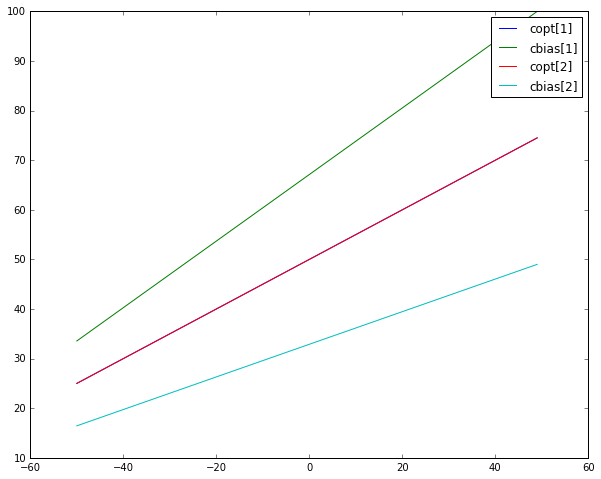

In [48]:

plt.plot(sz,C_opt(sz)[1],label='copt[1]')
plt.plot(sz,C_bias(sz)[1],label='cbias[1]')

plt.plot(sz,C_opt(sz)[2],label='copt[2]')
plt.plot(sz,C_bias(sz)[2],label='cbias[2]')
plt.legend()

In [18]:
C_opt(10)

[10, 145.0, 145.0]

In [19]:
C_bias(10)

[10, 194.63087248322148, 95.369127516778519]

In [20]:
cF = c.fcommit()
cF0=cF[0]
sF = c.y[0]-cF[0]
sF

48.48484848484847

In [ ]:
Plot Zero self utility under each 

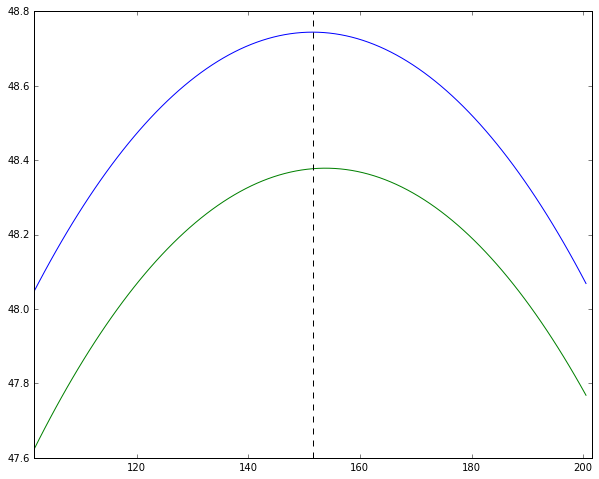

In [21]:
cz=np.arange(cF0-50,cF0+50)
plt.plot(cz,c.PVU(C_opt(cz),c.beta))
plt.plot(cz,c.PVU(C_bias(cz),c.beta))
plt.xlim(cF0-50,cF0+50)
plt.axvline(cF[0], color='k', linestyle='dashed')
plt.axvline(0, color='k', linestyle='solid')

In [ ]:
U_opt(50)[0]

In [ ]:
s=np.arange(1,sum(c.y))


Let's plot an indifference curve in c1-c2 space.  For example if the agent in autarky has income $\{y_{0},y_{1},y_{2}\}$ and no access to saving or borrowing then (from period 0 self's perspective) entering period 1 they have reservation utility $u(y_{1})+\delta u(y_{2})=\overline{u}_{0}$.  But when period 1 rolls around their preferences change. From period 1 self's perspective they have reservation utility $u(y_{1})+\beta \delta u(y_{2})=\overline{u}_{1}$.  

### Exclusive competitive contracts

The contract class defines a generic contract which holds consumption stream objects of the form $\left( c_{0},c_{1},c_{2}\right)$ and allows a few manipulations.  Now comes the job of solving for optimal contracts and we do this with a CompetitiveContract class which inherits the attributes and methods of the more generic contract class and then adds a few methods such as calculating the optimal contract full commitment and renegotiation-proof contracts in the competitive lender case.  Note that the methods have the same names as the mon_contract class but some behave differently, reflecting the reversed objective and constraint.


#### Full-commitment contracts

When the competitive lender can commit to not-renegotiating the contract (i.e. to not pandering to the period-1 self's desire to renegotiate period-0's contract) and the contracts are exclusive (so no third party lender will enter to offer such renegotiation either) the contract solves

$$\max \  u\left( c_{0}\right) +\beta \left[ \delta u\left( c_{1}\right) +\delta ^{2}u\left( c_{2}\right) \right] $$

subject to the zero profit constraint
$$s.t.  (y_{0}-c_{0})+\frac{(y_{1}-c_{1})}{(1+r)}+\frac{(y_{2}-c_{2})}{(1+r)^{2}}  \geq 0$$


When $\delta =\frac{1}{(1+r)}$ for the CRRA case an optimum will set $c_{1}=c_{2}=\overline{c}$ and $\overline{c}=\beta ^{\frac{1}{\rho }}c_{0}$ from which a closed form solution can be easily found (see fcommit() function below for formulas).

**Note** that we are here assuming that the consumer has no choice but to consume their income stream $y$ under autarky.  This would be true if the agent does not have acess to any 'own savings' technologies.  Later below we see how things change only slightly when we allow them to use own savings to create a slightly more smooth autarky consumption stream (not perfectly smooth because they cannot overcome their self-control problems on their own).

#### Renegotiaton-proof contracts

***[THIS EXPLANATION HAS NOT BEEN UPDATED YET]***
The agent's period-1-self's preferences differ from those of his period 0 self so they will often want to renegotiate any contract their period 0 self contracted, and the bank can profit from this renegotiation so long as its renegotiaton cost $\kappa $ is low.   In particular if the period-0-self agreed to contract $\left( \bar{c}_{0},\bar{c}_{1},\bar{c}_{2}\right) $ a competitive firm would offer to renegotiate the remaining $(\bar{c}_{1},\bar{c}_{2})$ to contract $\left( c_{1}^{r},c_{2}^{r}\right) $ chosen to maximize

$$\max \ \ u(c_{1})+\beta (\delta u(c_{1}) +\delta^{2} u(c_{2})) $$
subject to $$(y_{1}-c_{1})+\frac{(y_{2}-c_{2})}{(1+r)} \geq 0$$


We can show from the agent's first order conditions for the CRRA case that a renegotiated contract will always satisfy $c_{2}=\beta ^{\frac{1}{\rho }}c_{1}$ and indeed for CRRA we get the closed form:
$$ \hat{c}_{0} =\frac{\sum y_{i}}{1+2\beta^{1/\rho}}$$

and $c_{2}^{r}(\bar{c}_{1},\bar{c}_{2})=\beta ^{\frac{1}{\rho }}c_{1}^{r}(\bar{c}_{1},\bar{c}_{2})$.  See the reneg(c) function.

A sophisticated present-biased consumer anticipates that this type of renegotiation may happen and will only agree to renegotiation-proof contracts that do not renegotiate to favor their period 1 selves.  The profit-maximizing renegotiation-proof contract solves


$$\max_{c_{0},c_{1},c_{2}}\Pi \left( c_{0},c_{1},c_{2}\right) $$
$$U(c_{0},c_{1},c_{2})\geq U_{0}(y_{0},y_{1},y_{2})$$
$$\Pi \left( c_{1}^{r},c_{2}^{r}\right) -\Pi \left( c_{1},c_{2}\right) \leq \overline{\kappa }$$
The first constraint is the period 0 self's participation constraint and the second is the no-renegotiation proof constraint that the bank not find it profitable to offer to renegotiate to the contract that period-1 self will demand.

Let's create an object instance which we will call cM, printout the parameters associated with this instance and then run a few checks to make sure the cM.reneg function works right:

In [ ]:
cC = Contract.Competitive(beta = 0.5)
cC.rho = 1.25
cC.y = [200,50,50]
cC.print_params()

In [ ]:
cC.beta**(1/cC.rho)

###Full commitment contract: closed form solution
#### Case 1: where potential renegotiation surplus goes to consumer

In [ ]:
#Analytically calculated renegotiation proof when kappa=0
def ccrpa(C):
    B = C.beta**(1/C.rho)
    D = 1/(1+(1+B)*((C.beta+B)/(1+B))**(1/C.rho))
    c0 = sum(C.y)*D
    c1 = (sum(C.y)-c0)/(1+B)
    c2 = B* c1
    return np.array([c0, c1, c2])

cCRPa =ccrpa(cC)
print(cCRPa, cC.PVU(cCRPa,1))

In [ ]:
# Let's find reneg-proof contract for pure profit with zero reneg. cost
cCF=cC.fcommit()
cC.kappa = 0
cC.guess = cCRPa
cCR = cC.reneg(cCF)
cCRP = cC.reneg_proof().x
cCRP

In [ ]:
# compare three contracts (string label into var name)
print('kappa = ',cC.kappa)
print('y =',cC.y)
print("consumption and net saving in each period")
for con in ['cCF ', 'cCR ', 'cCRP','cCRPa']:
    C = eval(con)
    y = cC.y
    print(con + "       : {}  sum   : {:4.0f}"
          .format(C, C.sum()))
    print(con + "(net s): {}     profit: {:4.2f}"
          .format(y - C, cC.profit(C,cC.y)))
   
    print("PVU0: {:4.3f} {}  b*[]: {:4.3f}"
          .format(cC.PVU(C,cC.beta),cC.u(C),
                cC.beta*cC.u(C)[1:].sum() ))
    print("PVU(1): {:4.4f}"
          .format(cC.PVU(C[1:],cC.beta)))
    print("rate: {:4.2f}%".format(-100*(C[1:].sum()-sum(y[1:]))/C[0] ))
    print()

The bank does not profit from this type of opportunistic renegotiation, if we assume 'competition' at time of renegotiation **although one might argue** that the relation is ex-ante competitive but ex-post favors the bank.

A sophisticated consumer will however anticipate this type of opporunistic renegotiation and only agree to a renegotiation-proof contract.  

As expected the bank's profits are lowered due to its inability to commit to not renegotiate.

Here's a plot.

In [ ]:
c1min, c1max = np.min(cCR)*0.6, np.max(cC.y)
c1min = 0
c1max = 160
c1 = np.arange(0,c1max,c1max/20)
c1_ = np.arange(40,c1max,c1max/20)
y = cC.y
#cCRP = cCRPa
#indifference curves functions
ubar0 = cC.PVU(cCF[1:3], 1.0)
idc0 = cC.indif(ubar0, 1.0)
ubar1 = cC.PVU(cCF[1:3],cC.beta)
idc1 = cC.indif(ubar1,cC.beta)
ubar0RP = cC.PVU(cCRP[1:3], 1.0)
idc0RP = cC.indif(ubar0RP,1.0)
ubar1RP = cC.PVU(cCRP[1:3], cC.beta)
idc1RP = cC.indif(ubar1RP,cC.beta)


fig, ax = plt.subplots()
# trick to display contract points and coordinate lines http://bit.ly/1CaTMDX
xx = [cCF[1], cCRP[1]]
yy = [cCF[2], cCRP[2]]
plt.scatter(xx,yy, s=50, marker='o',color='b')
[plt.plot([dot_x, dot_x] ,[0, dot_y],':',linewidth = 1,color='black' ) for dot_x, dot_y in zip(xx,yy) ] 
[plt.plot([0, dot_x] ,[dot_y, dot_y],':',linewidth = 1,color='black' ) for dot_x, dot_y in zip(xx,yy) ]

# indifference curves
plt.plot(c1_,idc0(c1_),color='blue')          
#plt.plot(c1_,idc1(c1_),color='red') 
plt.plot(c1_,idc0RP(c1_),color='blue')
plt.plot(c1_,idc1RP(c1_),color='red')
# rays
plt.plot(c1, c1,':',color='black')
plt.plot(c1, cC.beta**(1/cC.rho)*c1,':',color='black')
# isoprofit line(s)
#isoprofline = cC.isoprofit(cC.profit(cMF,cC.y)-(y[0]-cCF[0]), y)
#plt.plot(c1,  isoprofline(c1),':' )

ax.spines['right'].set_color('none'), ax.spines['top'].set_color('none')
plt.ylim((c1min, c1max*0.9)), plt.xlim((c1min, c1max*0.9))
ax.xaxis.tick_bottom(),ax.yaxis.tick_left()
plt.xlabel('$c_{1}$'); plt.ylabel('$c_{2}$')

# label the points
ax.text(cCF[1]-1, cCF[2]+3, r'$F$', fontsize=15)
ax.text(cCRP[1]-3, cCRP[2]-5, r'$P$', fontsize=15)
ax.text(cCRP[1], -6, r'$c^{cp}_{1}$', fontsize=15)
ax.text(-8, cCRP[2], r'$c^{cp}_{2}$', fontsize=15)
ax.text(cCF[1], -6, r'$c^{cf}_{1}$', fontsize=15)
ax.text(-8, cCF[2], r'$c^{cf}_{2}$', fontsize=15)

#ax.text(0, -10, r'Competitive $\kappa = {}$'
#        .format(cC.kappa), fontsize=12)
#ax.text(0, -15, r'$\beta = {}, \  \rho = {}$'
#        .format(cC.beta, cC.rho), fontsize=12)

# isoprofit lines could be plotted like so
#isop  = cC.isoprofit( cC.kappa, cCRP)   # returns a function of c1 
#plt.plot(c1_, isop(c1_),':')
#turn off the axis numbers
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.savefig('figs\CompetitiveFig.eps', format='eps')
plt.show()

In [ ]:
# isoprofit lines could be plotted like so
# isop  = cM.isoprofit( 0.0, cM.y)   # returns a function of c1 
# plt.plot(c1, isop(c1))

In [ ]:
for cont in ['cCF ', 'cCR ', 'cCRP', 'cCRPa']:
    print(cont +":", eval(cont))

##Optimal contract when renegotiation cost $\kappa $ >0

Plot to explore how the renegotiation cost $\kappa $ affects the terms of the contract and firm profits

In [ ]:
# Note:  re-run all cells above if the plot seems wrong
cC.y = np.array([100,100,100]) 
cCF = cC.fcommit()
num_pts = 21
kaps = np.linspace(0, 10, num_pts)      # different renegotiation cost values 
cCRP, pvu0RP = np.zeros((3,num_pts)), np.zeros(num_pts)  # init (c0,c1,c2) and profits at each kappa

for i in range(0,num_pts):               # look through kappa recalculating optimal contract each time
    cC.kappa = kaps[i] 
    cCRP[:,i] = cC.reneg_proof().x 
    pvu0RP[i] = cC.PVU(cCRP[:,i],cC.beta)

c0,c1,c2 = cCRP[0,:], cCRP[1,:],cCRP[2,:]                # save results for plotting

fig, (ax0, ax1) = plt.subplots(nrows = 2)
#ax0.plot(kaps, c0, label='$c_{0}$')
ax0.plot(kaps, c1, label='$c_{1}$')
ax0.plot(kaps, c2, label='$c_{2}$')
ax0.plot(kaps, np.ones(num_pts)*cCF[1], '--', label='$c_{F}$')
ax0.grid()
ax0.set_title('Reneg-Proof Contract terms, PVU and $\kappa$'), ax0.set_ylabel('consumption')
ax0.legend(loc=9,bbox_to_anchor=(0.5, -1.25), ncol = 3)

ax1.plot(kaps, pvu0RP)
ax1.set_ylabel('PVU0')
ax1.grid()
ax1.set_xlabel('renegotiation cost $\kappa$')
pvumin,pvumax = min(pvu0RP), max(pvu0RP)
plt.ylim((pvumin, pvumax))
plt.tight_layout()
plt.show()

At lower renegotiation costs the bank is forced to offer less consumption smoothing in periods 1 and 2 as a way to credibly commit to limit their gains to renegotiation with a period 1 self.  Hence bank profits rise with their ability to commit to incur a renegotiation cost $\kappa$

We haven't plotted $c_{0}$ for each $\kappa$ but that's because it varies less relative to $c_{1}, c_{2}$ and way above the full commitment consumption smoothing. The following shows a non-monotonic relation though ws should remember this is varying very little.

In [ ]:
plt.plot(kaps, c0) 
plt.ylim((min(c0), max(c0)))
plt.xlabel('renegotiation cost $\kappa$')
plt.show()

### The choice to become a commercial non-profit

### Modeling the non-profit

The no-renegotiation constraint has two parts.  A pure for-profit captures fraction $\alpha = 1$ of profits and faces renegotiation cost 
not-for-profit of type $\alpha$ and faces renegotiation cost $h(\alpha) = h(1)$.  More generally a non-profit of type $\alpha$ has a no-renegotiation constraint of the form 
$$\alpha \left[ \Pi ^{R}-\Pi \right] \geq h(\alpha )$$

To be specific here let's model this as 
$$h(\alpha )=\kappa \left( 1-\alpha \right) $$

So that at $\alpha =1$ there is no cost to renegotiation and at $0< \alpha <1$ there is a non-negative non-pecuniary cost of up to $\kappa$.  The constraint can then be written as 
$$\left[ \Pi ^{R}-\Pi \right] \geq C(\alpha )=\frac{h(\alpha )}{\alpha }$$

In [ ]:
# Similar to above but solve for contract as a function of firm type ALPHA
y = np.array([100,100,100])          # To see how endowment affects contract
cC.y     = y                            
cCF      = cC.fcommit()
num_pts  = 10
alphs    = np.linspace(0.0,1.0,num_pts)   # iterate over different values of beta
HA       = 10*(np.ones(num_pts) - alphs)   #  h(alpha)/alpha  or cost of renegotiaton
cCRP     = np.zeros((3,num_pts))          # matrix for (c0,c1,c2) at each kappa
pvu0RP   = np.zeros(num_pts)  #PVU0 when contracting with alpha=1 firm

for i in range(0,num_pts):
    cC.kappa = HA[i]                 # change optimal contract
    cCRP[:,i] = cC.reneg_proof().x 
    cC.guess =  cCRP[:,i]                 # use this sol as guess for next optimum
    pvu0RP[i] = cC.PVU(cCRP[:,i],cC.beta)
    
#last entry is 'pure profit' pvu0RP[-1]
pvu0RP_pure = pvu0RP[-1]

c0,c1,c2 = cCRP[0,:], cCRP[1,:],cCRP[2,:]                # save results for plotting

fig3 = plt.figure()  
plt.plot(alphs,c1,'--',label='$c_{1}$')
plt.plot(alphs,c2,label='$c_{2}$')
plt.plot(alphs,np.ones(num_pts)*cCF[1],label='$c_{1}$ commit')
plt.grid()
plt.title('Renegotiation Proof Contract and alpha' )
plt.xlabel('alpha ')
plt.ylabel('consumption')
plt.legend(loc='upper left')
plt.show()

### 'Commercial' non-profits 
A 'pure' for profit (with $\alpha$=1.0) earns a reduced (possibly negative) profit due to it's inability to commit. Seen in the plot as profits the height of the horizontal line.

Any non-profit with $\alpha$ above about 0.4 and below 1.0 can better commit to not renegotiate a larger set of contracts and therefore can offer a more profitable renegotiation-proof contract. Even though they capture only fraction $\alpha$ of those profits, the take home profits exceed the profits of the pure for-profit. 

In [ ]:
cC.y = [130,85,85]  
#last entry is 'pure profit' pvu0RP[-1]
pvu0RP_full = pvu0RP[-1]*np.ones(num_pts)
pvu0_aut  = cC.PVU(cC.y,cC.beta)*np.ones(num_pts)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Renegotiation-Proof PVU0 vs. alpha')
plt.xlabel(r'type of firm $ \alpha$')
plt.ylabel('0-self present discounted utility')
plt.plot(alphs,pvu0RP_full,'--',label='PVU from pure-profit')
plt.plot(alphs,pvu0RP,label='PVU from non-profit')
plt.plot(alphs,pvu0_aut,label='PVU from autarky')

ax.fill_between(alphs, np.fmax(pvu0RP,pvu0_aut), pvu0_aut,hatch='/')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=None, ncol=5)
plt.show()

The figure above compares what the customer can get (present discounted utility of period 0 self) from autarky compared to what he could get contracting in a situation with competition and exclusive contracts.

In the particular example ($\beta = 0.5, \rho=0.75, y=[130,85, 85]$) the autarky consumption bundle is rather close to what could be offered via consumption smothing so the total surplus to be divided is not that large.  The pure for profit firm offers a renegotiation proof contract that does such a poor smoothing job that the consumer prefers to stay in authaky.  However a commercial non-profit with alpha below ~ 0.8 offers a smoother contract and hence gains to trade.  

Now as presently modeld that non-profit will of course get zero profits (80% of zero!). We can model instead situations where at any period 1 renegotiation it's the consumer who gives up all surplus since the assumption of exclusive contracts means the period 1 self will be willing to give up quite a bit. Or maybe they Nash bargain.  THese cases might be more realistic. 

We'll get to these in a moment but first lets look at how the above situation depends on the initial y vector. 
 

In [ ]:
cC.print_params()

In [ ]:
#plot(alphs,cMRP[0,:],label='$c_{0}$')
fig = plt.figure()
plt.plot(alphs,cCRP[0,:]-cC.y[0],label='$-c_{0}$')
plt.plot(alphs,cC.y[1]-cCRP[1,:],'--',label='$c_{1}$')
plt.plot(alphs,cC.y[2]-cCRP[2,:],label='$c_{2}$')

plt.title('Consumption profile as a function of alpha')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=None, ncol=5)
plt.show()

**Loan, repayment and PVU breakdown by periods as function of alpha**
(to be completed...results below are from monopoly case)

In [ ]:
#print("alpha      c0     c1    c2        profit = (y0-cMRP0) + (y1-cMRP1) + (y2-cMRP2)")
#print("-"*79)
#for i,a in enumerate(alphs):
#    print("{:5.2f}:   {:6.2f} {:6.2f} {:5.2f},   {:8.2f} = {:8.2f}   + {:8.2f}   + {:8.2f}   "
#          .format(a, cMRP[0,i], cMRP[1,i], cMRP[2,i],profitRP[i],y[0]-cMRP[0,i],y[1]-cMRP[1,i],y[2]-cMRP[2,i],))
#print()

The inability to commit means the renegotiation proof contract doesn't smooth consumption very well for the consumer.  This ends up hurting the bank, since they must now 'compensate' the consumer for the higher variance of consumption if the participation constraint is still to be met.  

The code that follows produces a grid of subplots to illustrate how the results (the relation between $\alpha$ and retained profits) depends on the initial y vector, which in turn also determines whether this will be borrowing or saving.  

##The role of y
###Gains to consumer with diferent firms $\alpha$
Even though it earns zero profits a pure for-profit firm's renegotiation proof contract will offer less consumption smoothing that a firm that due to its non-profit status has higher renegotiation costs.  

NOTE:  some parts of this script need manual adjustment

In [ ]:
print("Left: present discounted U (shaded = NP dominates). Right: net saving in each period as function of α :")
num_pts  = 21
alphs    = np.linspace(0,1,num_pts)       # iterate over different alphas
HA        = 10*(np.ones(num_pts)-alphs)     # h(alpha)/alpha  or cost of renegotiaton
cCRP     = np.zeros((3,num_pts))             # to store (c0,c1,c2) for each alpha
pvu0RP   = np.zeros(num_pts)  #PVU0 when contracting with alpha=1 firm
pvu0_aut  = cC.PVU(cC.y,cC.beta)*np.ones(num_pts)

fig, ax = plt.subplots(10,sharex=True)
numy0 = 3     # rows of subplots
ax = plt.subplot(numy0,2,1)

# Vary y contracts (maintaining PV at 300 in zero interest rate setting)
for j in range(1, numy0 + 1):  
    y0 = 100 + j*20
    y = np.array([y0,100,100])            
    y = np.array([y0,(300-y0)/2,(300-y0)/2])   
    cC.y = y
    pvu0_aut  = cC.PVU(cC.y,cC.beta)*np.ones(num_pts)
    
    ax1 = plt.subplot(numy0, 2, j*2-1, sharex=ax)  
    for i in range(0, num_pts):
        cC.kappa = HA[i]             # change reneg cost  
        
        cCRP[:,i]    = cC.reneg_proof().x 
        cC.guess     = cCRP[:,i]         # store sol as guess for next search
        pvu0RP[i] = cC.PVU(cCRP[:,i],cC.beta)
   
    #last entry is 'pure profit' pvu0RP[-1]
    #pvu0RP_pure = pvu0RP[-1]
    
    pvu0RP_full = pvu0RP[-1]*np.ones(num_pts) 
    
    # I HAVE NOT YET AUTOMATED THE AXIS BOUNDS
    pumin =  min(pvu0RP[-1],min(pvu0_aut))
    pumax = max(pvu0RP)
    ax1.set_ylim([50.25, 50.6])
    print(y,pumin,pumax,min(pvu0_aut),pvu0RP[-1])
    print("cCF : ",cCF)
    
    pvu0RP_full = pvu0RP[-1]*np.ones(num_pts) 
    ax1.set_title(r'$y=( %2.0f, %2.0f, %2.0f)$' %(y0,y[1],y[2]))
    ax1.plot(alphs, pvu0_aut,label='aut')
    ax1.plot(alphs, pvu0RP,label='NP')
    ax1.plot(alphs, pvu0RP_full,label='FP')
    ax1.fill_between(alphs, np.fmax(pvu0RP,pvu0_aut), pvu0_aut,hatch='/')
    plt.grid()
        
    ax2 = plt.subplot(numy0,2,j*2, sharex=ax, sharey=ax)    # Plot contract terms in right column plot
    #ax1.set_ylim([0, 25])
    ax2.plot(alphs, y0 - cCRP[0,:],"d--",label='$y_0-c_0$')
    ax2.plot(alphs, y[1] - cCRP[1,:],label='$y_1-c_1$')
    ax2.plot(alphs, y[2] - cCRP[2,:],"x-",label='$y_2-c_2$')
    #ax2.axhline(y=0, color ='k')
    #ax2.plot(alphs, y[0]*np.ones(num_pts))
    #ax2.plot(alphs, y[1]*np.ones(num_pts))
    plt.grid()    
ax1.legend(loc='lower center', fancybox=None, ncol=5)
ax2.legend(loc='lower center', fancybox=None, ncol=5)
plt.tight_layout()

plt.savefig('figs\Comp_excl.pdf', format='pdf')
plt.show()    

In [ ]:
plt.close('all')

**INTERPRETATION**: The left column of plots above shows renegotiation-proof profits as a function of $\alpha$ where $\alpha$ affects both the share of profits that are captured as well as the cost of renegotiation as described above.  The blue shaded area indicates where commercial non-profits (that choose an $\alpha <1$) capture more profit than a pure for-profit. 

The right column of plots shows the terms of the associated contract displayed as 'net savings' (y0-c0), (y1-c1), and (y2-c2).  When these are positive the client is saving or repaying, when negative they are borrowing.

When we keep the PV of y constant but change the ratio of period zero income y0 to later period income, y vectors that lead to borrowing (lower y0, higher y1,y2) deliver higher full-commitment (and renegotiation-proof) profits at any level of alpha. 

Since most of the profits are in the 0 to 1 period, they weigh more heavily in total profits.  Turning non-profit is only attractive at relatively high values of alpha (since at lower alpha they're forfeiting the period 0-1 profits). At higher y0 (tilted more toward savings) full commitment (and renegotiation-proof) profits are lower The pattern seems to be that as we move toward first period savings...

### NOT FINISHED
Profitability as a function of y0

### Own-savings strategies

In [ ]:
cC = Contract.Competitive(beta = 0.9)
cC.rho = 0.5
cC.y = [110,95,95]
cC.print_params()

In [ ]:
def saving(c,y):
    return c-y

In [ ]:
print(cC.y)
print(cC.ownsmooth())
print(cC.fcommit())

In [ ]:
saving(cC.ownsmooth(),cC.y)

In [ ]:
PDV =300
y0_step = 2
y0_start = 50
y0_end = PDV -50
Y0 = range(y0_start,y0_end,y0_step)
n = len(Y0)
profity0 = np.zeros(n)
profity0B = np.zeros(n)
i=0

for y0 in Y0:  
    ybar = (PDV-y0)/2
    cM.y =([y0,ybar,ybar])
    cMF = cM.fcommit()
    cMRP = cM.reneg_proof().x
    cM.guess = cMRP
    profity0[i] = cM.profit(cMRP,cM.y)
    profity0B[i] = cM.profit(cMF,cM.y)
    
    i += 1

In [ ]:
plt.plot(profity0,Y0,'b-',label="reneg. proof")
plt.plot(profity0B,Y0,'r',label="full commit")
plt.xlim([-2,6])
plt.ylim([80,160])c

plt.title("Profits as a function of y0")
plt.xlabel("profits $\pi$")
plt.ylabel("y0")
plt.legend(loc='center right')
plt.grid()
plt.axvline()

## Modifications when consumer has a home savings option##
The above ana

In [ ]:
cM = Monopoly(0.8) 

In [ ]:
cM.kappa =0
cM.guess = cMF
cMRP = cM.reneg_proof()
cMRP.x

In [ ]:
plot(alphs,C)

In [ ]:
# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(alphs, profitRP)
ax1.plot(alphs, NprofitRP)
ax1.plot(alphs,cM.profit(cMF,y)*ones(num_pts))
ax1.grid(True)
ax1.set_title('Sharing both axes')
ax2.plot(alphs, NprofitRP)
ax3.plot(alphs,cM.profit(cMF,y)*ones(num_pts))
show()

## Other Results

### $\beta$ and loan size

Let's plot the the relationship between period 0 loan size in a full-commitment contract and the extent of present-bias captured by $\beta$

In [ ]:
cM = Contract.Monopoly(0.8)               # create an instance m

num_pts = 21
betas = np.linspace(0.1,1,num_pts)           # iterate over different values of beta
CMF = np.zeros((3,num_pts))                  # a three row matrix to store (c0,c1,c2) for each beta

for i in range(0,num_pts):
    cM.beta = betas[i]                    # change beta before recalculating optimal contract
    CMF[:,i] = cM.fcommit()       

loan   = CMF[0,:] - cM.y[0]               # save results for plotting
repay1 = CMF[1,:] - cM.y[1]
repay2 = CMF[2,:] - cM.y[2]

plt.plot(betas,loan,'--')                          # plot    
plt.plot(betas,repay1)
plt.plot(betas,repay2)
plt.grid()
plt.title('Monopoly Commitment Contract as function of beta')
plt.xlabel('beta')
plt.ylabel('net repayment')
plt.legend(['loan','repay1','repay2'])

### Example full commitment contract (and renegotiation with a naive consumer)

Here is an example of the full-commitment contracts a monopolist offers and the contract a monopolist and a naive consumer would renegotiate to from that same full commitment contract (but note that a intermediary who knows they are dealing with a naive consumer would bait them with a different initial contract). 

In [ ]:
cM.beta = 0.8            # Reset to beta = 0.8 case and print out other parameters
cM.print_params()

In [ ]:
cMF = cM.fcommit()      
cMr = cM.reneg(cMF)       
y = cM.y
print('0-Discounted utility full commit: {0:4.3f}'.format(cM.PVU(cMF,cM.beta)))
print('and   Naive renegotiate: {1:4.3f}'.format(cM.PVU(cMr,cM.beta)))
#print('Profits from full commit: {0:4.3f}   and   Naive renegotiate:{1:4.3f}'.format(cM.profit(y,cMF), cM.profit(y,cMr)))

##### Scratch play area

#### 3D plots

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
cset = ax.contour(X, Y, Z)
ax.clabel(cset, fontsize=9, inline=1)

plt.show()

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
c0, c1 = np.arange(0,150,1), np.arange(0,150,1)
c2 =  
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()


### Is $c_0$ (and hence net borrowing) higher or lower in renegotiation-proof contracts?
It's going to depend on $\rho$ 

In [ ]:
bb = np.arange(0,1,0.05)
bb

In [ ]:
for rh in np.arange(0.2,2,0.2):
    c0RP = 300/(1+bb+bb**(1/rh))
    c0F = 300/(1+2*bb**(1/rh) ) 
    rat = c0RP/c0F
    plt.plot(bb,rat)
    plt.annotate('{:3.1f}'.format(rh),xy=(0.5,rat[len(rat)/2]))
plt.title(r'Ratio $\frac{c_0^{RP}}{c_0^F}$')
plt.xlabel(r'$\beta $')
plt.show()

In [ ]:
for rh in np.arange(0.2,2,0.2):
    c0RP = 300/(1+bb+bb**(1/rh))
    c0F = 300/(1+2*bb**(1/rh) ) 
    rat = c0RP/c0F
    plt.plot(bb,c0F)
    plt.annotate('{:3.1f}'.format(rh),xy=(0.5,rat[len(c0RP)/2]))
plt.title(r'consumption $c_0^{RP}$')
plt.xlabel(r'$\beta$')
plt.show()

In [70]:
len('BDDBCBDBDBCBAA BBAAABCBCCBCABBCABBBAAAADD')
DBDDBCBDBDBCBAA BBAAABCBCCBCABBCABBBAAAADD

41

In [71]:
len('BDDBCCDCDBCBBAABDDAACCDBBBCABCDABBCAxACDA')

41